In [100]:
import pandas as pd
from pathlib import Path
import os
import numpy as np

In [101]:

project_folder = "animal_clasificacion" 
if os.getcwd().endswith("/tf"):
    os.chdir(project_folder)

In [102]:
BASE_DIR = Path().cwd()

IMG_DIRECTORY = BASE_DIR / 'raw-img'


animales_show = {}

cantidad_fotos = {}

for folder in os.listdir(IMG_DIRECTORY):
    imagenes = list((IMG_DIRECTORY / folder).iterdir())
    len_images = len(imagenes)
    cantidad_fotos[folder]= len_images
    if imagenes:
        animales_show[folder] = imagenes

    

In [103]:
cantidad_fotos

{'mucca': 1866,
 'gallina': 3098,
 'elefante': 1446,
 'gatto': 1668,
 'ragno': 4821,
 'cane': 4863,
 'cavallo': 2623,
 'pecora': 1820,
 'scoiattolo': 1862,
 'farfalla': 2112}

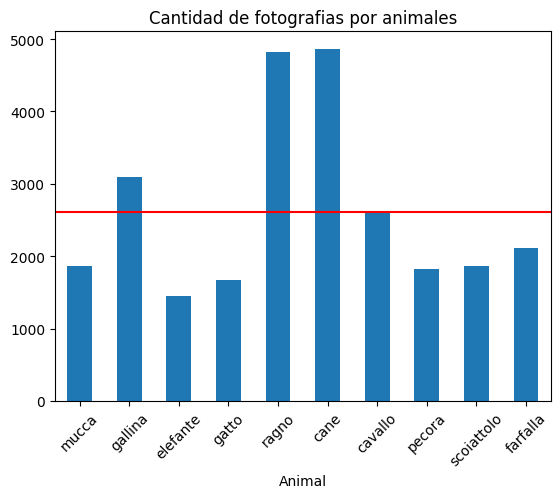

In [104]:
import matplotlib.pyplot as plt
df_totales = pd.DataFrame(list(cantidad_fotos.items()), columns=['Animal', 'Cuenta'])

df_totales.plot(kind='bar', x='Animal', y='Cuenta', legend=False)
plt.title('Cantidad de fotografias por animales')
plt.axhline(df_totales['Cuenta'].mean(), color='r')
plt.xticks(rotation=45)
plt.show()

In [105]:
new_data = {}

cantidad_fotos = {}

for folder in os.listdir(IMG_DIRECTORY):
    imagenes = list((IMG_DIRECTORY / folder).iterdir())[:2000]
    len_images = len(imagenes)
    cantidad_fotos[folder]= len_images
    if imagenes:
        new_data[folder] = imagenes

    

In [106]:
cantidad_fotos

{'mucca': 1866,
 'gallina': 2000,
 'elefante': 1446,
 'gatto': 1668,
 'ragno': 2000,
 'cane': 2000,
 'cavallo': 2000,
 'pecora': 1820,
 'scoiattolo': 1862,
 'farfalla': 2000}

In [107]:
first_item = { key:new_data[key][0] for i, (key, value) in enumerate(new_data.items())}

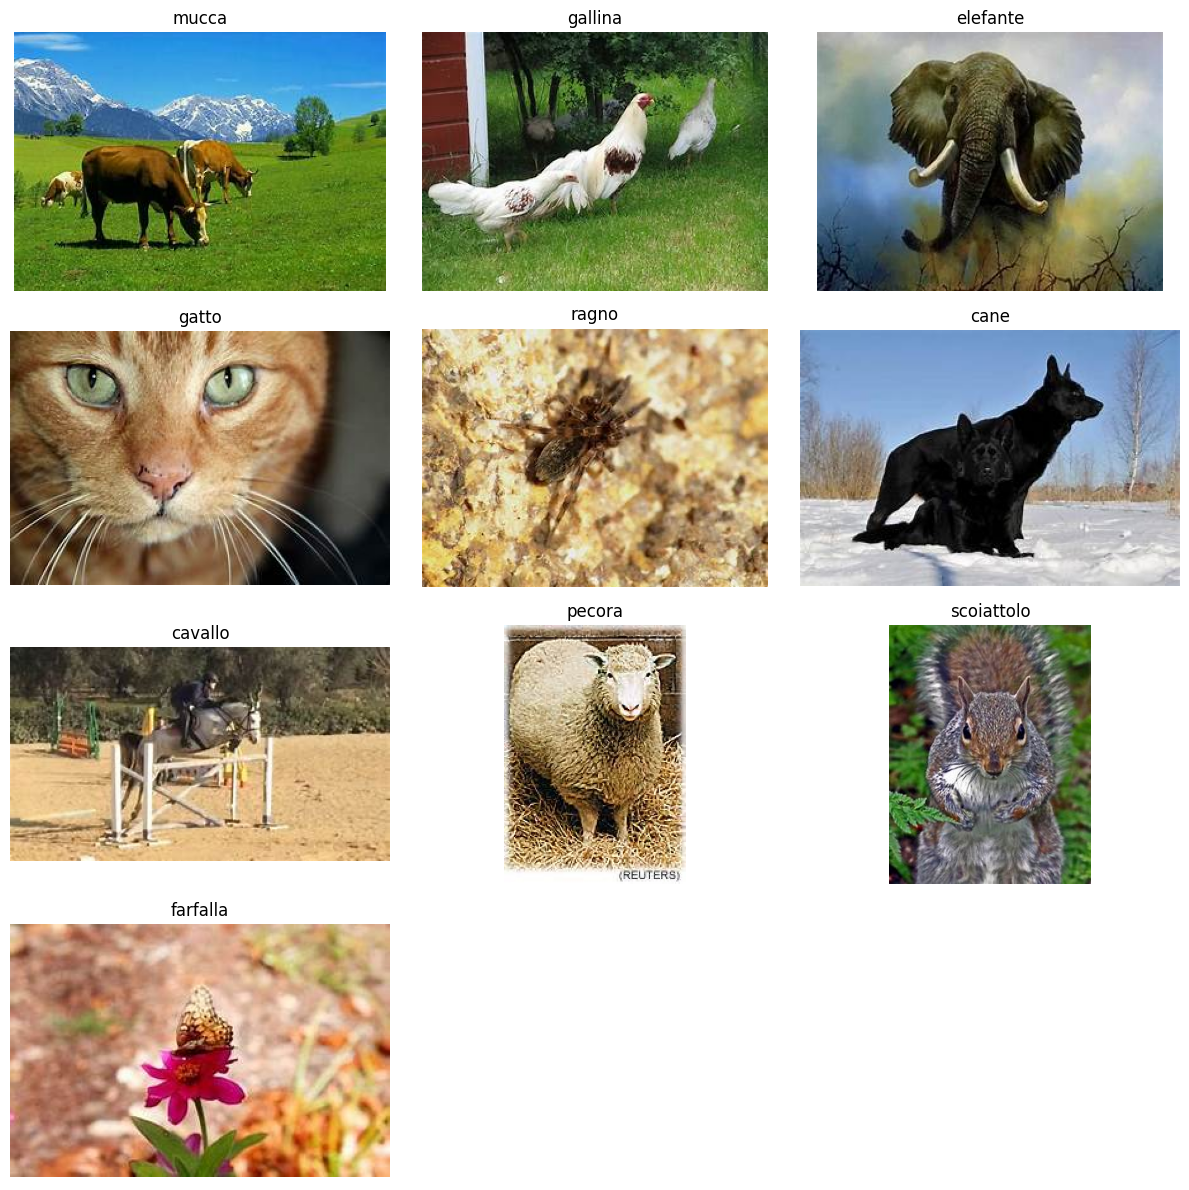

In [ ]:
from PIL import Image

fig, axes = plt.subplots(4, 3, figsize=(12, 12))
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}


axes = axes.flatten()


for i, (clase, path) in enumerate(first_item.items()):
    img = Image.open(path)
    axes[i].imshow(img)
    axes[i].set_title(clase, fontsize=12)
    axes[i].axis('off')

for j in range(i+1,len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
